# Naive Bayes

INFO 371 Winter 2019

Lab created by: Zening Qu

Deadline: 11:59pm Feb 26, 2019

In this lab we will build multinomial naive bayes classifiers to predict movie ratings (`fresh` or `rotten`) based on user quotes. The dataset can be downloaded at https://canvas.uw.edu/courses/1256537/files/54325781/download?download_frd=1 We will split the dataset into three subsets: train, validation, and test. We will perform cross-validation on the train and validation set to pick a good smoothing parameter alpha. Then, we will evaluate the model performance (classification accuracy) using the test dataset.

## Step 0: Load Dataset

First let's load the dataset and split it into train, validation, and test. The code is already written for you. Please feel free to `print` or explore the dataset on your own.

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data():
    df = pd.read_csv("rotten-tomatoes.csv")
    df = df[df.fresh != 'none']
    y =  pd.get_dummies(df.fresh).fresh
    # split train, validation, and test set
    X_train, X_test, y_train, y_test = train_test_split(df.quote, y, test_size=0.1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = load_data()

## Step 1: Naive Bayes

1.1 Let's vectorize the quotes by counting word frequencies and fit a Naive Bayes classifier on the *training* set. Because our features are discrete word counts, we will use `MultinomialNB` from `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html). Please run the code below and report the train and validation accuracy (Hint: they should be around 92% and 77%).

1.2 The smoothing prior `alpha` accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting `alpha =1` is called *Laplace* smoothing; setting `alpha = 0.1` is called *Lidstone* smoothing, setting `alpha = 0` means no smoothing. Please set `alpha` to `0, 0.1, 1` in the code below and report the train and validation accuracy. Among the three parameter settings, which gives the best model performance (i.e., the highest validation accuracy)?

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer(stop_words='english')
vectorizer = vectorizer.fit(X_train)

# todo: set alpha = 0, 0.1, 1
alphas = [0, 0.1, 1]

for i in alphas:
    print("For alpha =", i)
    clf = MultinomialNB(alpha = i)

    X_train_vec = vectorizer.transform(X_train).toarray()
    clf.fit(X_train_vec, y_train)
    print('train accuracy:', clf.score(X_train_vec, y_train))

    X_val_vec = vectorizer.transform(X_val).toarray()
    print('validation accuracy', clf.score(X_val_vec, y_val), "\n")

For alpha = 0


/Users/yasmine/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


train accuracy: 0.956113717913
validation accuracy 0.75082781457 

For alpha = 0.1
train accuracy: 0.950869445211
validation accuracy 0.769867549669 

For alpha = 1
train accuracy: 0.921795933389
validation accuracy 0.790562913907 



**alpha = 1 gives the best model performance**

## Step 2: Cross-Validation to Pick Smoothing Parameter

2.1 Now let's try some different `alpha` values. Please complete the code below and plot the train and validation accuracies against `alpha` values. Please plot two lines, put `alpha` on the x axis, train and validation accuracy on the y axis. Please use color blue for the train accuracy and orange for the validation accuracy.

2.2 Based on your plot, which `alpha` value is the best for model performance (i.e., pick the `alpha` with the best *validation* accuracy)? Report the optimal `alpha` and its train and validation accuracy.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

alpha = np.arange(1e-10,5,0.5)
# todo: fit clf on train, report train and validation accuracy

data = {'alpha': [], 'type': [], 'acc': []}

for i in alpha:
    print("For alpha =", i)
    clf = MultinomialNB(alpha = i)
    
    data['alpha'].append(i)
    data['alpha'].append(i)

    X_train_vec = vectorizer.transform(X_train).toarray()
    clf.fit(X_train_vec, y_train)
    print('train accuracy:', clf.score(X_train_vec, y_train))
    
    data['type'].append('train')
    data['acc'].append(clf.score(X_train_vec, y_train))

    X_val_vec = vectorizer.transform(X_val).toarray()
    print('validation accuracy', clf.score(X_val_vec, y_val), "\n")
    data['type'].append('validation')
    data['acc'].append(clf.score(X_val_vec, y_val))


For alpha = 1e-10
train accuracy: 0.956113717913
validation accuracy 0.75082781457 

For alpha = 0.5000000001
train accuracy: 0.935872665379
validation accuracy 0.787251655629 

For alpha = 1.0000000001
train accuracy: 0.921795933389
validation accuracy 0.790562913907 

For alpha = 1.5000000001
train accuracy: 0.909467292299
validation accuracy 0.774006622517 

For alpha = 2.0000000001
train accuracy: 0.895206550741
validation accuracy 0.770695364238 

For alpha = 2.5000000001
train accuracy: 0.88306191922
validation accuracy 0.76738410596 

For alpha = 3.0000000001
train accuracy: 0.869721225504
validation accuracy 0.762417218543 

For alpha = 3.5000000001
train accuracy: 0.857208574846
validation accuracy 0.758278145695 

For alpha = 4.0000000001
train accuracy: 0.845339957678
validation accuracy 0.754966887417 

For alpha = 4.5000000001
train accuracy: 0.83282730702
validation accuracy 0.751655629139 



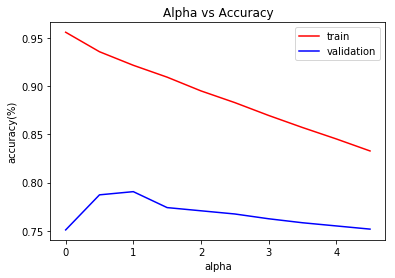

In [47]:
# todo: plot x = alpha, y = accuracy, color = [train, validation]

import matplotlib.pyplot as plt

data = pd.DataFrame.from_dict(data)

data_train = data[data['type'] == 'train']
data_val = data[data['type'] == 'validation']

plt.plot(data_train['alpha'], data_train['acc'], label = 'train', c = 'red')
plt.plot(data_val['alpha'], data_val['acc'], label = 'validation', c = 'blue')
plt.xlabel("alpha")
plt.ylabel("accuracy(%)")
plt.title("Alpha vs Accuracy")
plt.legend(['train', 'validation'])
plt.show()

Based on our plot, the alpha value that is the best for model performance (i.e., the alpha with the best validation accuracy) is **alpha = 1**. We see printed earlier that for our optimal alpha:

train accuracy: 0.921795933389 

validation accuracy 0.790562913907 

## Step 3: Evaluate on Test Set

3.1 With the optimal `alpha` you found in step 2, fit the Naive Bayes classifer on (train + validation) set and evaluate the model performance on the test set. Report the test accuracy. 

Note: After measuring test accuracy, do **not** change `alpha` any more. You should only change `alpha` during cross-validation (step 2). If you change `alpha` after looking at test acccuracy, you leak information from the test set to the model and your test accuracy will not be an unbiased estimator of the model's prediction accuracy any more!

In [68]:
# combine train and validation to form a new train set
X_train_total = X_train.append(X_val)
y_train_total = y_train.append(y_val)

# todo: fit Naive Bayes classifier on X_train_total and y_train_total

clf = MultinomialNB(alpha = 1)

X_train_vec = vectorizer.transform(X_train_total).toarray()
clf.fit(X_train_vec, y_train_total)
print('train accuracy:', clf.score(X_train_vec, y_train_total))

X_test_vec = vectorizer.transform(X_test).toarray()
print('test accuracy', clf.score(X_test_vec, y_test))


# todo: evaluate model performance on X_test and y_test, report test accuracy

train accuracy: 0.919458035378
test accuracy 0.774217585693
